<a href="https://colab.research.google.com/github/Russia31/dap-2024/blob/main/les07/lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №7. Классификация

Выполните следующие задания:

1. Откройте в файл в Google Colab (используйте собственный форк репозитория).
2. Решите задачи.
3. Сохраните результат в виде файла rep.ipynb в ваш репозиторий github в директорию ./les07
4. Создайте pull request в репозиторий https://github.com/chebotarevsa/dap-2024. Название pull request должно иметь формат "<Номер лабораторной работы>  <Номер группы> <ФИО>"
5. Сдайте работу в системе "Пегас", в отчет укажите ссылку на pull request

Используя набор данных titanic.csv постройте модель предсказывающую выжил или погиб пассажир.
1.	PassengerId – Идентификатор пассажира (уникальный номер для каждого пассажира).
2.	Survived – Выжил (0 – не выжил, 1 – выжил).
3.	Pclass – Класс пассажира (1 – первый класс, 2 – второй класс, 3 – третий класс).
4.	Name – Имя (полное имя пассажира).
5.	Sex – Пол (male – мужчина, female – женщина).
6.	Age – Возраст (числовое значение, может быть дробным).
7.	SibSp – Количество родственников на борту (братьев, сестер или супругов).
8.	Parch – Количество родителей или детей на борту.
9.	Ticket – Номер билета.
10.	Fare – Стоимость билета (в фунтах стерлингов).
11.	Cabin – Номер каюты (может быть пропущен, если данные отсутствуют).
12.	Embarked – Порт посадки (C – Cherbourg, Q – Queenstown, S – Southampton).

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

print(f"Python version: {sys.version}")
print(f"Numpy version: {np.version.version}")
print(f"Pandas version: {pd.__version__}")
print(f"Matplotlib version: {mpl.__version__}")

## Извлечение данных

1. Создайте DataFarame из файла titanic.csv, в качестве индекса используйте столбец "PassengerId".

In [ ]:
import sys
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

file_path = "titanic.csv"
try:
    titanic_df = pd.read_csv(file_path, index_col="PassengerId")
    print("DataFrame успешно создан!")

except FileNotFoundError:
    print(f"Файл {file_path} не найден. Убедитесь, что указали правильный путь.")


2. Выведете первые 7 строк набора.

In [ ]:
print(titanic_df.head(7))

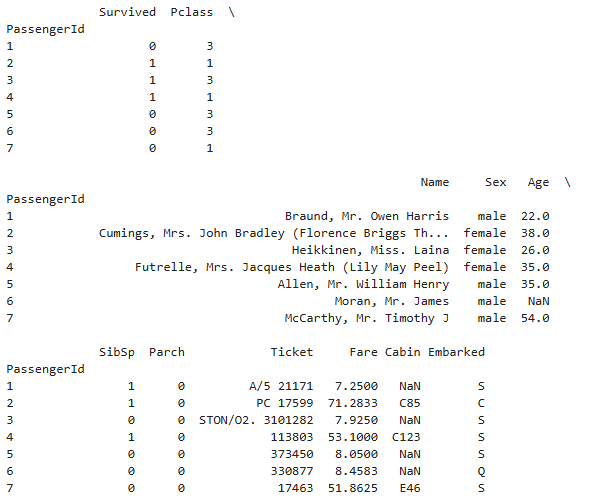

### Подготовка данных

3. Выведете информацию о типах данных в наборе. Имеются ли в наборе не числовые признаки? Имеются ли в наборе данные имеющие значение null?
    

In [ ]:
print(titanic_df.info())

print("\nПропущенные значения по столбцам:")
print(titanic_df.isnull().sum())


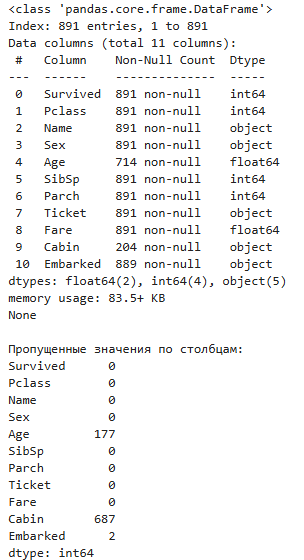

4. Удалите не числовые признаки, которые по вашему мнению, не могут влиять на заначение выжил или погиб пассажир.

In [ ]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
titanic_df_cleaned = titanic_df.drop(columns=columns_to_drop)

print(titanic_df_cleaned.head())


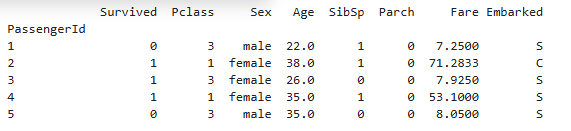

5. Вместо признака "Sex" (я надеюсь вы его не удалили 😂) Создайте два новых признака male и female которые содержат значения 0 или 1.

In [ ]:
sex_dummies = pd.get_dummies(titanic_df_cleaned['Sex'], prefix='', prefix_sep='')
titanic_df_cleaned = pd.concat([titanic_df_cleaned, sex_dummies], axis=1)

titanic_df_cleaned = titanic_df_cleaned.drop(columns=['Sex'])

print(titanic_df_cleaned.head())


sex_dummies = pd.get_dummies(titanic_df_cleaned['Sex'], prefix='', prefix_sep='')
titanic_df_cleaned = pd.concat([titanic_df_cleaned, sex_dummies], axis=1)

titanic_df_cleaned = titanic_df_cleaned.drop(columns=['Sex'])

print(titanic_df_cleaned.head())
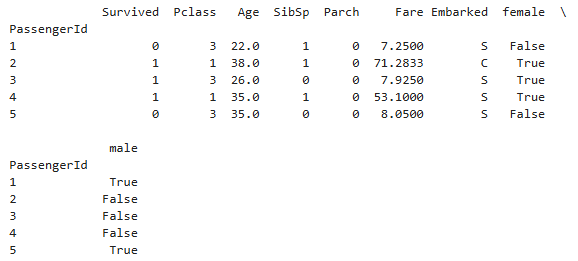

6. Удалите строки, которые содержать хотя бы одно null значение.

In [ ]:

titanic_df_cleaned = titanic_df_cleaned.dropna()
print(f"Размер набора данных после удаления строк с null значениями: {titanic_df_cleaned.shape}")


Размер набора данных после удаления строк с null значениями: (712, 9)

## Исследование данных

4. Нормализуйте значения признака "Fare".

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
titanic_df_cleaned['Fare'] = scaler.fit_transform(titanic_df_cleaned[['Fare']])

print(titanic_df_cleaned['Fare'].head())


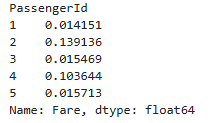

5. Найдите разницу между средними значениями признака "Fare" для погибших и выживших пассажиров.

In [ ]:
mean_fare_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 1]['Fare'].mean()
mean_fare_not_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 0]['Fare'].mean()

difference = mean_fare_survived - mean_fare_not_survived

print(f"Средний 'Fare' для выживших: {mean_fare_survived:.4f}")
print(f"Средний 'Fare' для погибших: {mean_fare_not_survived:.4f}")
print(f"Разница: {difference:.4f}")


Средний 'Fare' для выживших: 0.1008

Средний 'Fare' для погибших: 0.0448

Разница: 0.0560

6. Простройте на одной оси координат гистограмы значений признака "Fare" для погибших и выживших пассажиров.

In [ ]:
import matplotlib.pyplot as plt

fare_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 1]['Fare']
fare_not_survived = titanic_df_cleaned[titanic_df_cleaned['Survived'] == 0]['Fare']

plt.figure(figsize=(10, 6))
plt.hist(fare_survived, bins=20, alpha=0.7, label='Выжившие', color='green', edgecolor='black')
plt.hist(fare_not_survived, bins=20, alpha=0.7, label='Погибшие', color='red', edgecolor='black')

plt.title('Гистограмма распределения Fare для выживших и погибших пассажиров')
plt.xlabel('Fare (нормализованное значение)')
plt.ylabel('Частота')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


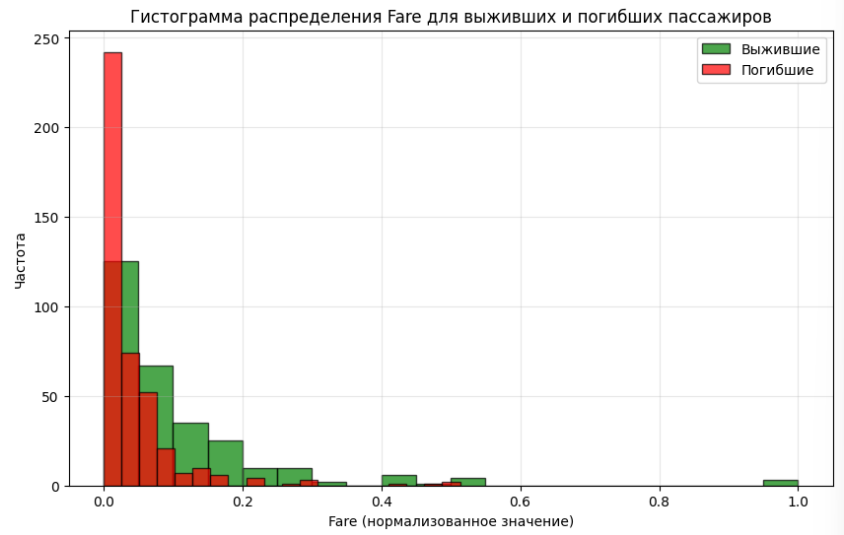

7. Сформируйте набор признаков (X). Сформируйте вектор целевых значений (y).

In [ ]:
X = data.drop(columns=['Survived'])

y = data['Survived']

print("Набор признаков X:")
print(X.head())

print("\nВектор целевых значений y:")
print(y.head())


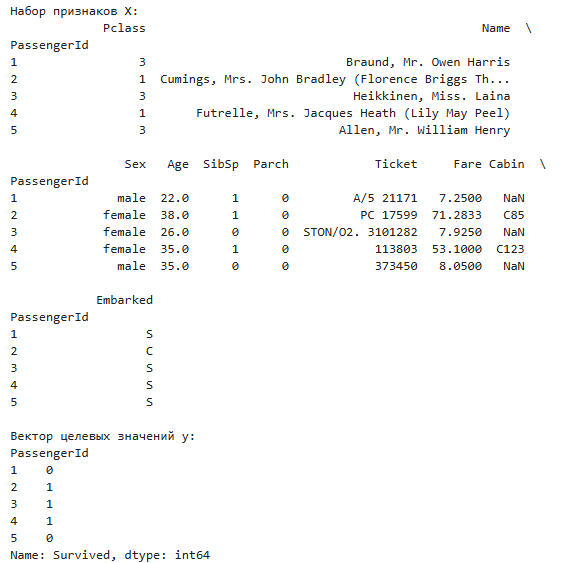

## Предсказательная модель

8. Разделите набор данных на два, одни для обучения модели другой для проверки. Тестовый набор должен содержать 25 процентов данных.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(f"Размер тренировочного набора (X_train): {X_train.shape}")
print(f"Размер тестового набора (X_test): {X_test.shape}")
print(f"Размер вектора целей для обучения (y_train): {y_train.shape}")
print(f"Размер вектора целей для тестирования (y_test): {y_test.shape}")


Размер тренировочного набора (X_train): (668, 10)

Размер тестового набора (X_test): (223, 10)

Размер вектора целей для обучения (y_train): (668,)

Размер вектора целей для тестирования (y_test): (223,)

9. Выполните обучение модели.

In [ ]:
model.fit(X_train, y_train)

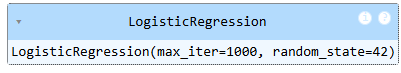

## Проверка модели

10. Выведите мартицу ошибок

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


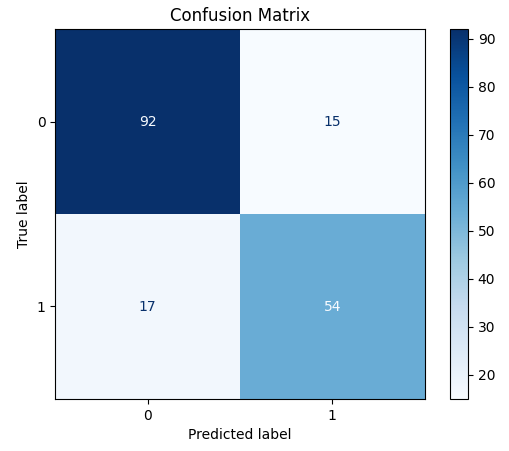

11. Расчитайте accuracy

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8202

Вывод:Полученное значение accuracy = 0.8202 означает, что модель классифицирует пассажиров (выжили они или нет) правильно в 82% случаев. Это говорит о достаточно хорошей способности модели предсказывать исход для пассажиров на основе имеющихся признаков.

## Вопросы для защиты

1. Сформулируйте задачу классификации.
2. Перечислите типы классификации.
3. В чем особенность несбалансированной классификации?
4. В чем особенность мультиклассовой классификации?
5. В чем особенность бинарной классификации?
6. В чем особенность классификации по нескольким меткам?
7. Чем стратегия "Один против всех" отличается от стратегии "Один против одного"?
8. Что такое матрица ошибок (несоответствий)?
9. Как рассчитывается Accuracy?
10. Объясните алгоритм классификации K-ближайших соседей.